## Do the following in the iris dataset.

## 1. Read the dataset to the python environment.

In [1]:
#importing packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading data
df=pd.read_excel(r"C:\Users\rakhi\Downloads\iris.xls")

In [3]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<AxesSubplot:ylabel='Classification'>

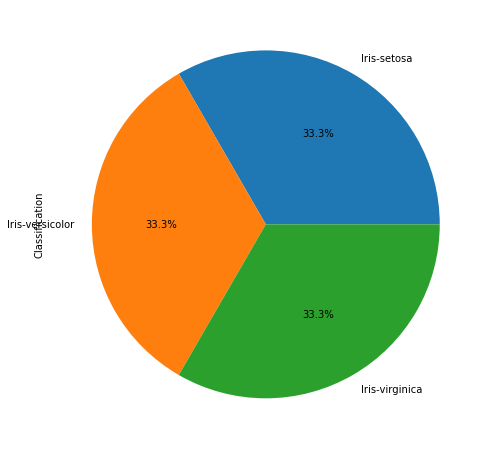

In [6]:
df.Classification.value_counts().plot(kind="pie",autopct='%.1f%%',figsize=(8,8))

This is a balanced dataset

## 2. Do necessary pre-processing steps.

In [7]:
#checking null values
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

There are null values.

In [8]:
#filling of missing values by foreward filling
df1=df.ffill(axis=0)
df1

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.9,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.0,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
#checking for null values
df1.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

We can see there are no more null values

In [10]:
df1.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.858667,3.048000,3.748667,1.198667
std,0.843068,0.424694,1.759375,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:>

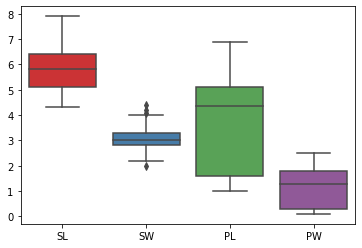

In [11]:
sns.boxplot(data=df1,palette="Set1")

There are outliers in the column SW.

[Text(0.5, 1.0, 'Distribution of Sepal Width')]

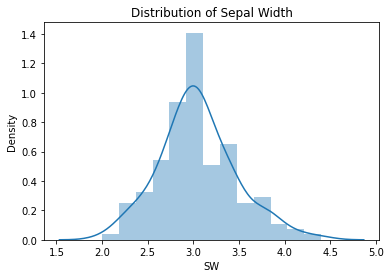

In [12]:
sns.distplot(df1["SW"]).set(title="Distribution of Sepal Width")

The column SW has a symmetrical normal distribution.

In [13]:
df1["SW"].skew()

0.3858815611418886

Since skewness is 0.3 and the observations are natural part of the population, we shouldnt be removing it.

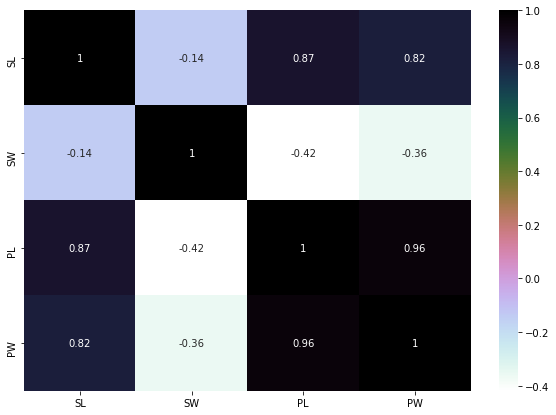

In [14]:
plt.figure(figsize=(10,7))
sns.heatmap(df1.corr(), annot=True, cmap='cubehelix_r')
plt.show()

1. Sepal length has high positive correlation with petal width and petal length.

2. Petal length and petal width has very high positive correlation between them.

3. Sepal width has low negative correlation with sepal length, petal length and petal width.

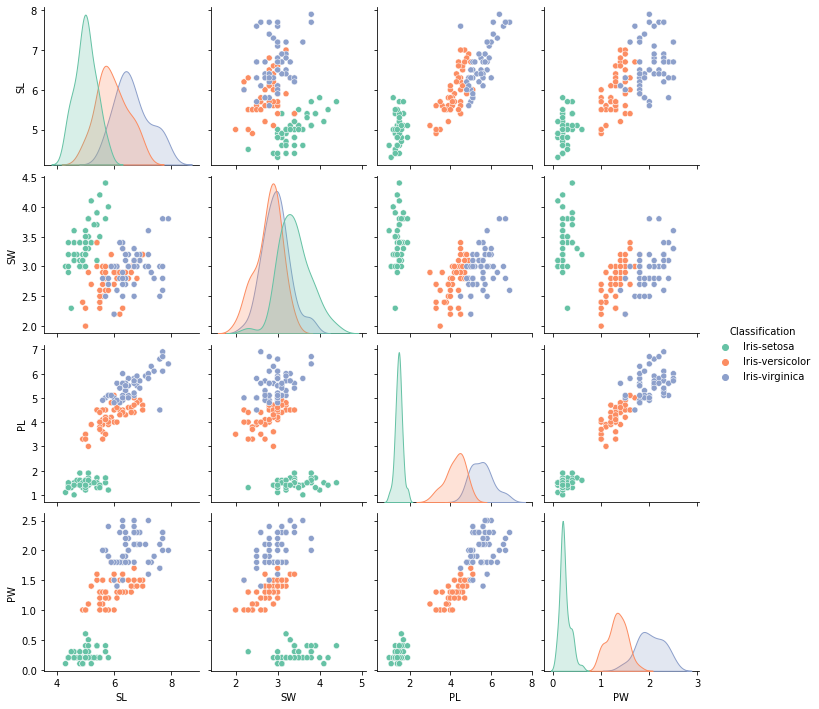

In [15]:
sns.pairplot(df1,hue="Classification",palette='Set2')

## 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

### Training and testing data splitting

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report

In [17]:
X = df1.drop("Classification",axis=1)
y = df1["Classification"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=21)

## KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn=KNeighborsClassifier()

In [21]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [22]:
y_pred=knn.predict(X_test)

In [23]:
accuracy_score(y_pred,y_test)

0.9666666666666667

In [24]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.88      1.00      0.93         7

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



## SVM

In [25]:
from sklearn.svm import SVC

In [26]:
sv=SVC()

In [27]:
sv.fit(X_train,y_train)

SVC()

In [28]:
y_pred=sv.predict(X_test)

In [29]:
accuracy_score(y_pred,y_test)

0.9

In [30]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.91      0.83      0.87        12
 Iris-virginica       0.75      0.86      0.80         7

       accuracy                           0.90        30
      macro avg       0.89      0.90      0.89        30
   weighted avg       0.91      0.90      0.90        30



## Decision tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dtc=DecisionTreeClassifier()

In [33]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [34]:
y_pred=dtc.predict(X_test)

In [35]:
accuracy_score(y_pred,y_test)

0.8666666666666667

In [36]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.83      0.83      0.83        12
 Iris-virginica       0.71      0.71      0.71         7

       accuracy                           0.87        30
      macro avg       0.85      0.85      0.85        30
   weighted avg       0.87      0.87      0.87        30



## Random forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rc=RandomForestClassifier()

In [39]:
rc.fit(X_train,y_train)

RandomForestClassifier()

In [40]:
y_pred=rc.predict(X_test)

In [41]:
accuracy_score(y_test,y_pred)

0.9333333333333333

In [42]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.78      1.00      0.88         7

       accuracy                           0.93        30
      macro avg       0.93      0.94      0.93        30
   weighted avg       0.95      0.93      0.93        30



## Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
lg=LogisticRegression()

In [45]:
lg.fit(X_train,y_train)

LogisticRegression()

In [46]:
y_pred=lg.predict(X_test)

In [47]:
accuracy_score(y_pred,y_test)

0.9

In [48]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.91      0.83      0.87        12
 Iris-virginica       0.75      0.86      0.80         7

       accuracy                           0.90        30
      macro avg       0.89      0.90      0.89        30
   weighted avg       0.91      0.90      0.90        30



We can see that KNN is the best.